In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [7]:
df = pd.read_csv('lifestyle_sustainability_data.csv')
df.index

RangeIndex(start=0, stop=499, step=1)

In [9]:
color_map = {'Mostly Plant-Based': 'forestgreen',
             'Balanced': 'cornflowerblue',
             'Mostly Animal-Based': 'firebrick',
             'Younger': 'mediumslateblue',
             'Middle': 'gold',
             'Older': 'peru'}

DietType
Mostly Plant-Based     197
Balanced               158
Mostly Animal-Based    144
Name: count, dtype: int64


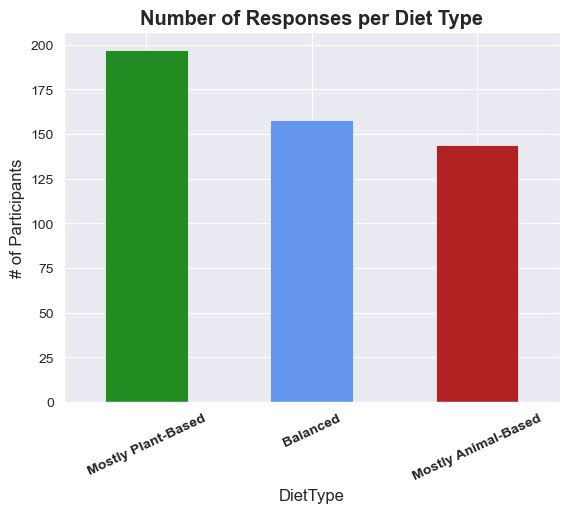

In [11]:
sns.set_style("darkgrid")

Diet_counts = df['DietType'].value_counts()
colors = Diet_counts.index.map(color_map)

Diet_counts.plot(kind = 'bar', color = colors)
plt.title('Number of Responses per Diet Type',weight = 'bold')
plt.ylabel('# of Participants')

plt.xticks(rotation = 25,weight = 'bold')
print(Diet_counts)
plt.savefig('diettype_count.png', dpi=100, bbox_inches='tight')
plt.show()


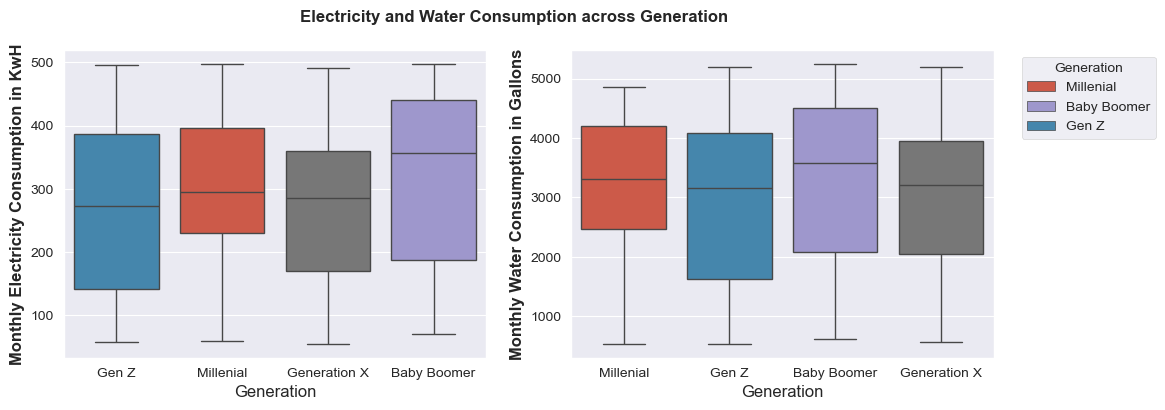

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Baby Boomer' if a > 60 else 'Generation X' if 60 > a > 45
                                  else 'Millenial' if 45> a> 29 else 'Gen Z')

fig, (ax1,ax2)= plt.subplots(1,2, figsize=(12,4))

sns.boxplot(data = df, x = 'Generation', y = 'MonthlyElectricityConsumption',
               hue='Generation', order=['Gen Z', 'Millenial','Generation X', 'Baby Boomer'], legend=False, ax=ax1)
ax1.set_ylabel('Monthly Electricity Consumption in KwH',weight = 'bold')

sns.boxplot(data = df, x = 'Generation', y = 'MonthlyWaterConsumption',
               hue='Generation', legend=True, ax=ax2)
ax2.set_ylabel('Monthly Water Consumption in Gallons',weight = 'bold')
plt.suptitle('Electricity and Water Consumption across Generation',weight = 'bold')

handles, labels = plt.gca().get_legend_handles_labels() 
order = [0,2,1]

plt.legend([handles[i] for i in order],[labels[x] for x in order],
           title='Generation',
          bbox_to_anchor=(1.05,1),
          loc=('upper left'))

plt.show()



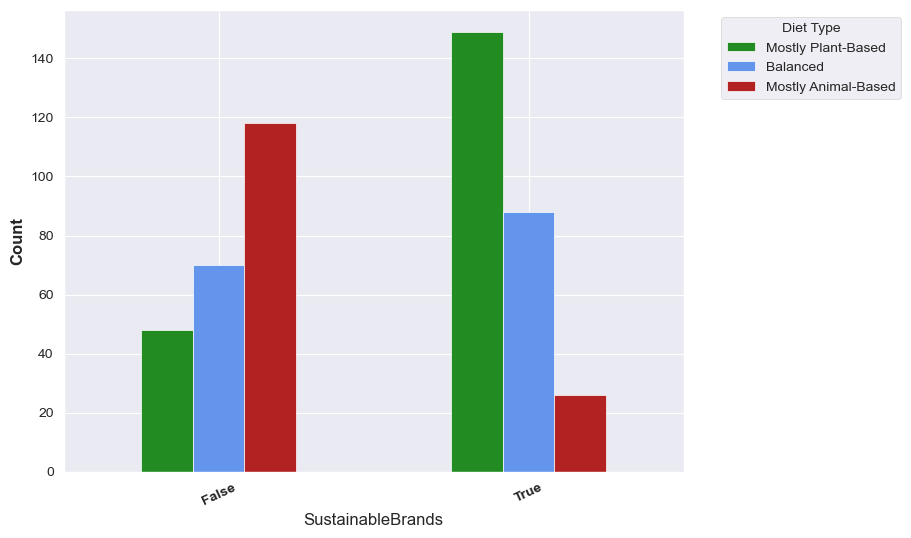

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')

brands = pd.crosstab(df['SustainableBrands'], df['DietType'])   
#brands = brands.reindex(['True', 'False'])
brands = brands.iloc[ : ,[2,0,1]]


fig, ax= plt.subplots( figsize=(6,10))

brands.plot(kind='bar', stacked =False, color=color_map, figsize=(8,6), ax=ax)


order = [2,0,1]
plt.legend(title='Diet Type', 
            bbox_to_anchor=(1.05, 1), 
            loc='upper left', 
            ncol=1, 
            frameon=True)
plt.ylabel('Count',weight = 'bold')
plt.xticks(rotation = 25,weight = 'bold')

#plt.savefig('generation_and_diettype_bar.png', dpi=100, bbox_inches='tight')
plt.show()

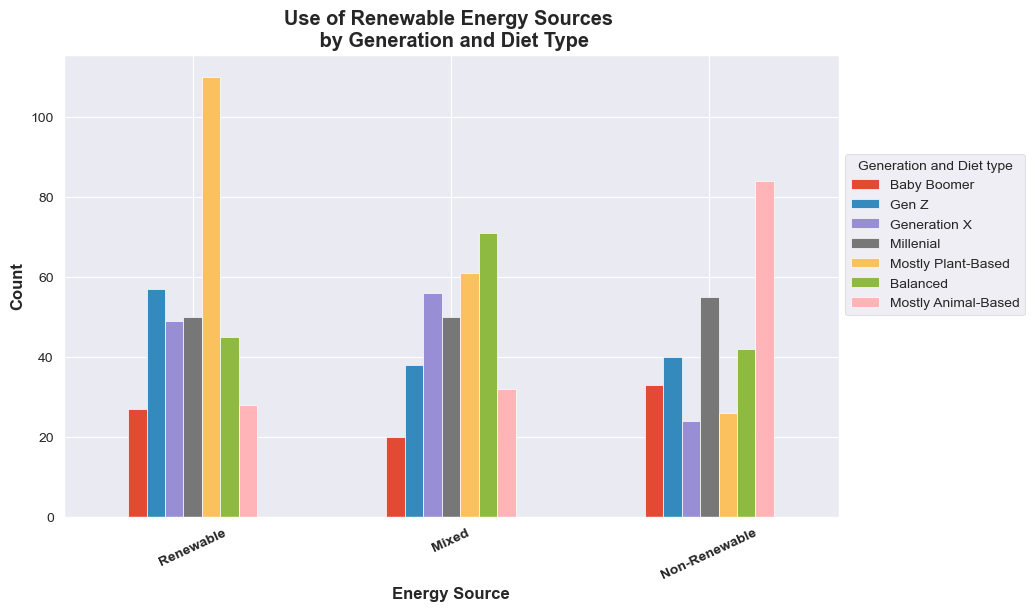

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Baby Boomer' if a > 60 else 'Generation X' if 60 > a > 45
                                  else 'Millenial' if 45> a> 29 else 'Gen Z')

energy_diet = pd.crosstab(df['EnergySource'],df['DietType'])
energy_diet = energy_diet.reindex(['Renewable', 'Mixed', 'Non-Renewable'])
energy_diet = energy_diet.iloc[ : ,[2,0,1]]

energy_age = pd.crosstab(df['EnergySource'],df['Generation'])
energy_age = energy_age.reindex(['Renewable', 'Mixed', 'Non-Renewable'])
#energy_age = energy_age.iloc[ : ,[2,0,1]]

energy= pd.merge(energy_age, energy_diet, on ='EnergySource')

energy.plot(kind='bar', stacked = False,figsize=(10, 6))


plt.xticks(rotation=25,weight = 'bold')

plt.title('Use of Renewable Energy Sources \n by Generation and Diet Type',weight = 'bold')
plt.ylabel('Count',weight = 'bold')
plt.xlabel('Energy Source',weight = 'bold')
plt.xticks()
plt.legend(title = 'Generation and Diet type',
          loc = 'upper left',
          bbox_to_anchor = (1., .8))

plt.show()

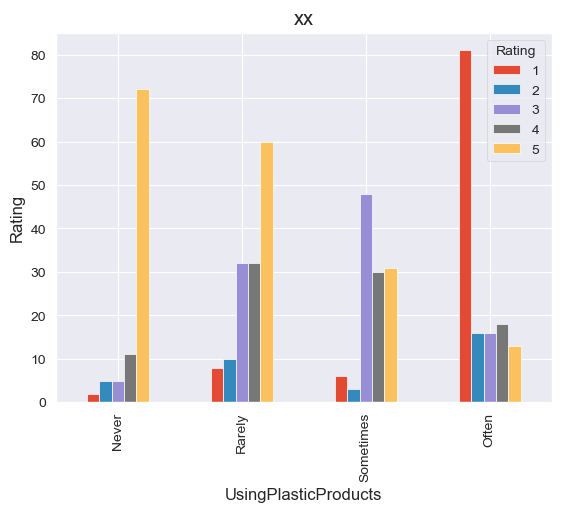

Rating                 1   2   3   4   5
UsingPlasticProducts                    
Never                  2   5   5  11  72
Rarely                 8  10  32  32  60
Sometimes              6   3  48  30  31
Often                 81  16  16  18  13


In [19]:
order=['Never','Rarely','Sometimes','Often']
plastic_use = pd.crosstab(df['UsingPlasticProducts'], df['Rating']).reindex(order)


plastic_use.plot(kind = 'bar')
plt.title('xx')
plt.ylabel('Rating')

plt.show()
print(plastic_use)

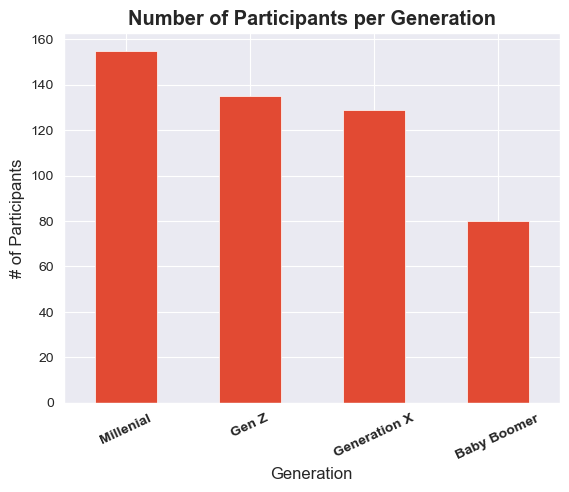

Generation
Millenial       155
Gen Z           135
Generation X    129
Baby Boomer      80
Name: count, dtype: int64
499




In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Baby Boomer' if a > 60 else 'Generation X' if 60 > a > 45
                                  else 'Millenial' if 45> a> 29 else 'Gen Z')

Generation_counts = df['Generation'].value_counts()
colors = Generation_counts.index.map(color_map)

Generation_counts.plot(kind = 'bar')
plt.title('Number of Participants per Generation',weight = 'bold')
plt.ylabel('# of Participants')
plt.xticks(rotation = 25,weight = 'bold')
plt.savefig('generation_count.png', dpi=100, bbox_inches='tight')
plt.show()
print(Generation_counts)
print(sum(Generation_counts))
print('\n')

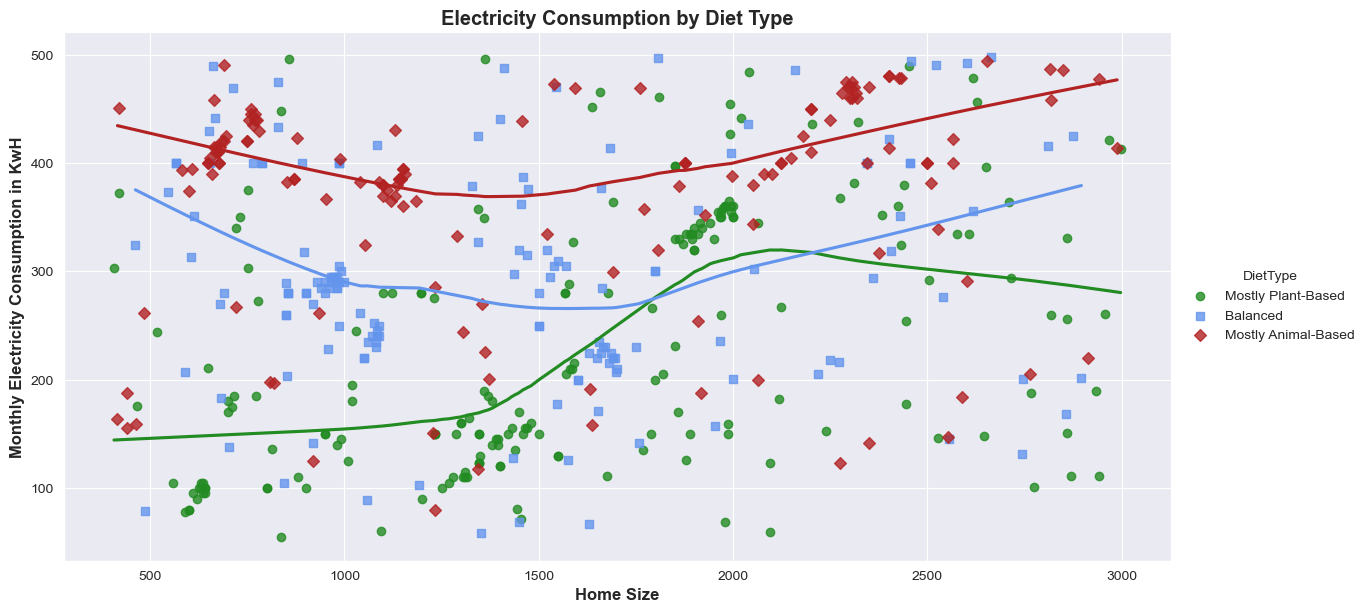

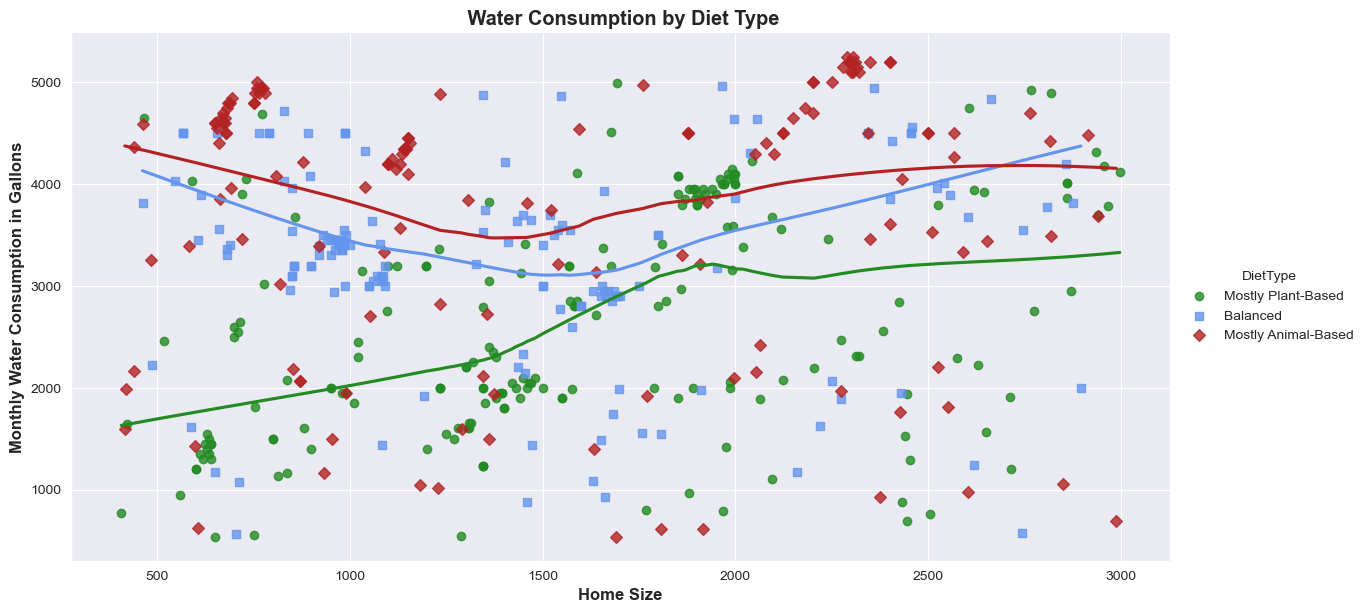

In [23]:
sns.lmplot(x="HomeSize", y="MonthlyElectricityConsumption", data=df, 
           hue="DietType", lowess = True ,markers=["o", "s", "D"],aspect=2, height=6,palette= color_map)
plt.title("Electricity Consumption by Diet Type",weight = 'bold')
plt.xlabel("Home Size",weight = 'bold')
plt.ylabel("Monthly Electricity Consumption in KwH",weight = 'bold')
plt.savefig('lmplot_electricity_homesize-diettype.png', dpi=100, bbox_inches='tight')

sns.lmplot(x="HomeSize", y="MonthlyWaterConsumption", data=df, 
           hue="DietType", lowess=True, markers=["o", "s", "D"],aspect=2, height=6,palette= color_map)
plt.title(" Water Consumption by Diet Type",weight = 'bold')
plt.xlabel("Home Size",weight = 'bold')
plt.ylabel("Monthly Water Consumption in Gallons",weight = 'bold')
plt.savefig('lmplot_Water_homesize-diettype.png', dpi=100, bbox_inches='tight')

plt.show()


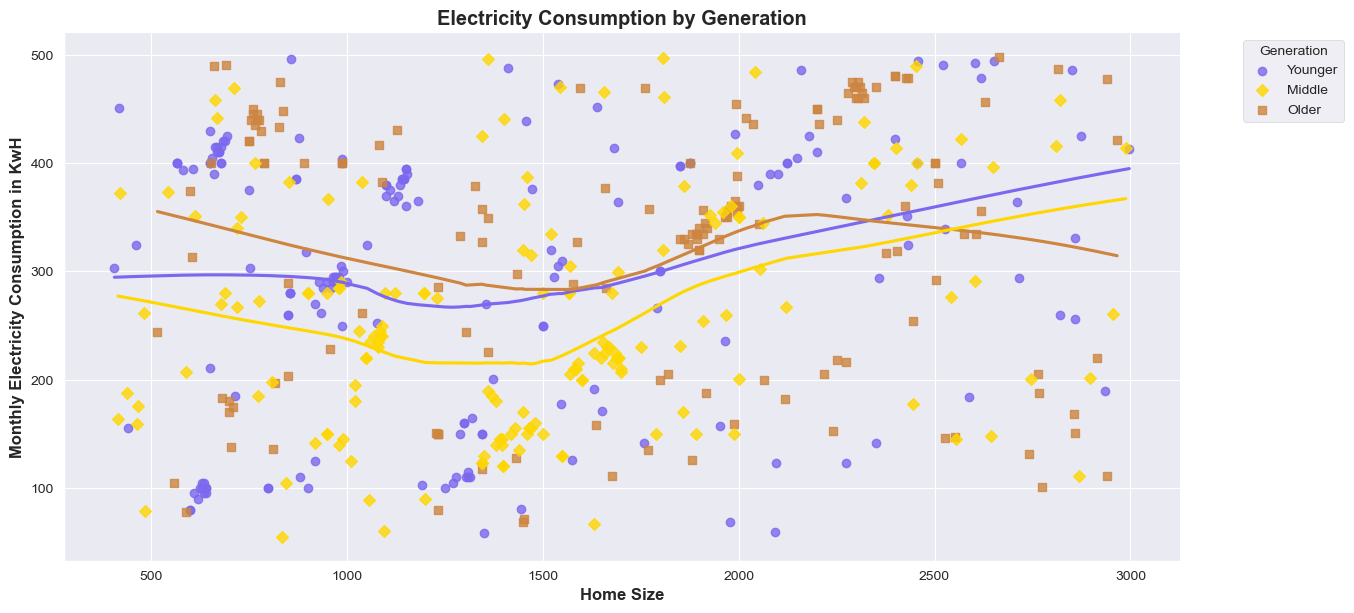

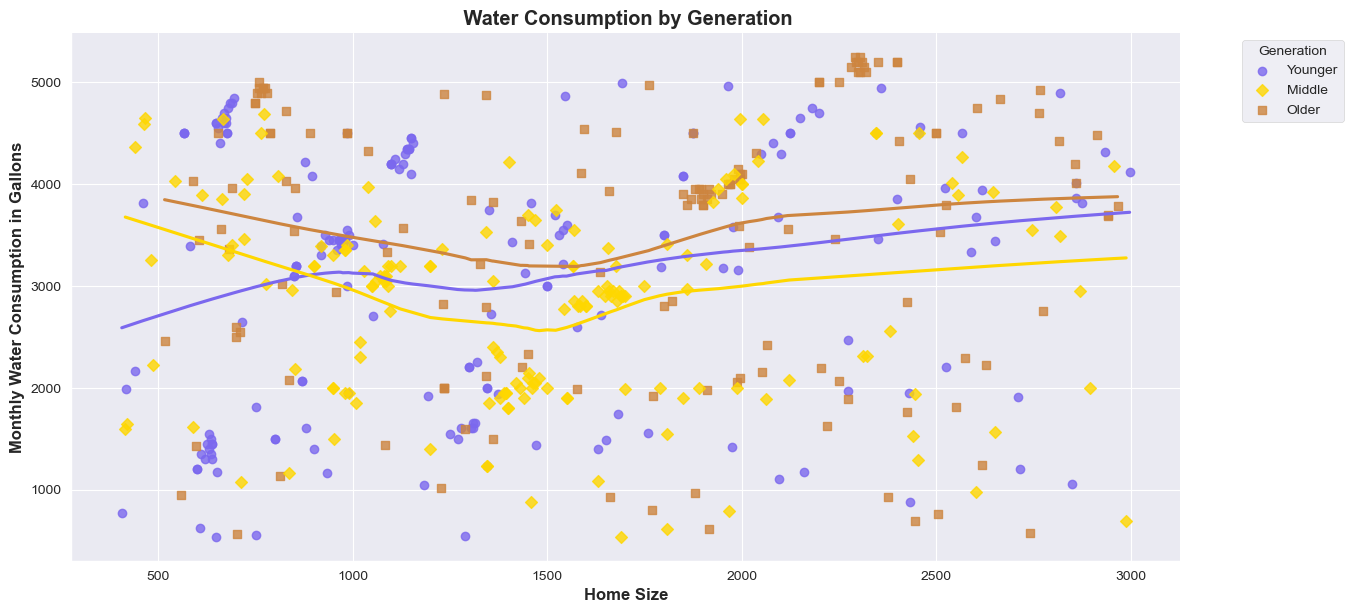

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('lifestyle_sustainability_data.csv')
df['Generation']= df['Age'].apply(lambda a: 'Older' if a > 55 else 'Middle' if 55>a >35 else 'Younger')
sns.set_style("darkgrid")
sns.lmplot(x="HomeSize", y="MonthlyElectricityConsumption", data=df, 
           hue="Generation", lowess = True ,markers=["o", "s", "D"],aspect=2, height=6,palette= color_map, legend = False)

plt.title("Electricity Consumption by Generation",weight = 'bold')
plt.xlabel("Home Size",weight = 'bold')
plt.ylabel("Monthly Electricity Consumption in KwH",weight = 'bold')
handles, labels = plt.gca().get_legend_handles_labels() 
order = [0,2,1]
plt.legend([handles[i] for i in order],[labels[x] for x in order],
           title='Generation',
          bbox_to_anchor=(1.05,1),
          loc=('upper left'))
plt.savefig('lmplot_electricity_homesize-diettype.png', dpi=100, bbox_inches='tight')

sns.lmplot(x="HomeSize", y="MonthlyWaterConsumption", data=df, 
           hue="Generation", lowess=True, markers=["o", "s", "D"],aspect=2, height=6,palette= color_map, legend = False)
plt.title(" Water Consumption by Generation",weight = 'bold')
plt.xlabel("Home Size",weight = 'bold')
plt.ylabel("Monthly Water Consumption in Gallons",weight = 'bold')
handles, labels = plt.gca().get_legend_handles_labels() 
order = [0,2,1]
plt.legend([handles[i] for i in order],[labels[x] for x in order],
           title='Generation',
          bbox_to_anchor=(1.05,1),
          loc=('upper left'))
plt.savefig('lmplot_Water_homesize-diettype.png', dpi=100, bbox_inches='tight')

plt.show()